# Comparison of scorer behaviour statistics and DLC results 


We used DLC to do a tracking of the animal in the arena. The tracking was done for the positions of nose, both ears, head and body. A position is defined if the likelihood of the tracking algorithm for a certain position surpases a certain threshold (LIKELIHOOD THRESHOLD). There are multiple tracking information files: the ones with the position at all times that contains the positions for all of the markers, a tracking for the positions that surpases the threshold that contains tha mean 'x' and 'y' positions of the markers, the category behaviour positions which correspond to which object is being explore in which positions and the head direction information (a unity lenght vector containing the difference between nose and head positions).

Here we want to make a first comparison between the category vector and the scorer information that was obteined during the experiment. Idealy we will use the new DLC information to process the calcium data.

Then we will take a look at how the rest of the tracking information looks like, as head direction and position over time.

Taking into account that the calcium data was extracted in a day by day bases, for each session there are also 5 files of the tracking (tracking, head direction and category of exploration). In exploration files we use the same criteria as in the explorer (0 means resting, 1 navigating and 2-5 exploring different objects).

For exploring we are using the following criteria: if the animal is within a circle of radius 150pixels arround the object and looking towards it, or if the animal is within a radius of 75 pixels arround the object. (DISTANCE THRESHOLD)

Also we added the looking forward vector (0 means resting, 1 navigating and 2-5 exploring visualy and from far away different objects). (LOOKING AT THRESHOLD = pi/2)

In [103]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
import scipy
from sklearn.metrics import confusion_matrix
cmap = cm.jet

In [104]:
mouse = 32363        ### mouse number id
session_now =1               ## session that will run

min_event_duration = 10
fixed = 'None'
## define task for plotting. This will cahnge for other mice!!!!
if mouse == 56165 or mouse == 32364:
    if mouse == 56165:
        sessions = [1,2,4]       ## sessions for this particular mouse
    if mouse == 32364:
        sessions = [1,2]
    if session_now == 1:
        task = 'OVERLAPPING'
        if mouse == 32364:
            fixed = 'LR'
        if mouse == 56165:
            fixed = 'UR'
    else:
        if session_now == 2:
            task = 'STABLE'
        else:
            task = 'RANDOM'
            
if mouse == 32365:
    sessions = [2,3] ## sessions for this particular mouse
    if session_now == 2:
        task = 'RANDOM'
    else:
        if session_now == 3:
            task = 'OVERLAPPING'
            fixed = 'LR'
            
if mouse == 56166:
    sessions = [1,2] ## sessions for this particular mouse
    if session_now == 1:
        task = 'RANDOM'
    else:
        if session_now == 2:
            task = 'OVERLAPPING'
            fixed = 'UR'
            
if mouse == 32366:
    sessions = [2,3] ## sessions for this particular mouse
    if session_now == 3:
        task = 'RANDOM'
            
if mouse == 32363:
    sessions = [1,2] ## sessions for this particular mouse
    if session_now == 1:
        task = 'RANDOM'
    else:
        if session_now == 2:
            task = 'OVERLAPPING'
            fixed = 'UL'

In [105]:
scorer_behaviour_dir = os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/scoring_time_vector/'
dlc_behaviour_dir = os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/category_behaviours/' + f'{mouse}' + '/session_' + f'{session_now}' + '/'
timeline_file_dir = os.environ['PROJECT_DIR'] + 'neural_analysis/data/timeline/'

figure_path = os.environ['PROJECT_DIR'] +'calcium_imaging_behaviour/figures/'

In [106]:
day = 0
beh_file_name_scorer = 'mouse_'+f'{mouse}'+'_session_'+f'{session_now}'+'_day_'+f'{day+1}'+'_event_'+f'{min_event_duration}' +'.npy'
beh_file_name_dlc =  'mouse_' + f'{mouse}' + '_session_' + f'{session_now}' +'_day_'+f'{day+1}'+'_likelihood_0.75.npy'
looking_file_name_dlc =  'mouse_' + f'{mouse}' + '_session_' + f'{session_now}' +'_day_'+f'{day+1}'+'_likelihood_0.75_inspection.npy'


In [107]:
## LOAD BEHAVIOUR SCORER
behaviour_scorer = np.load(scorer_behaviour_dir + beh_file_name_scorer)
## LOAD BEHAVIOUR DLC
behaviour_dlc = np.load(dlc_behaviour_dir + beh_file_name_dlc)
looking_dlc = np.load(dlc_behaviour_dir + looking_file_name_dlc)

/home/melisa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.


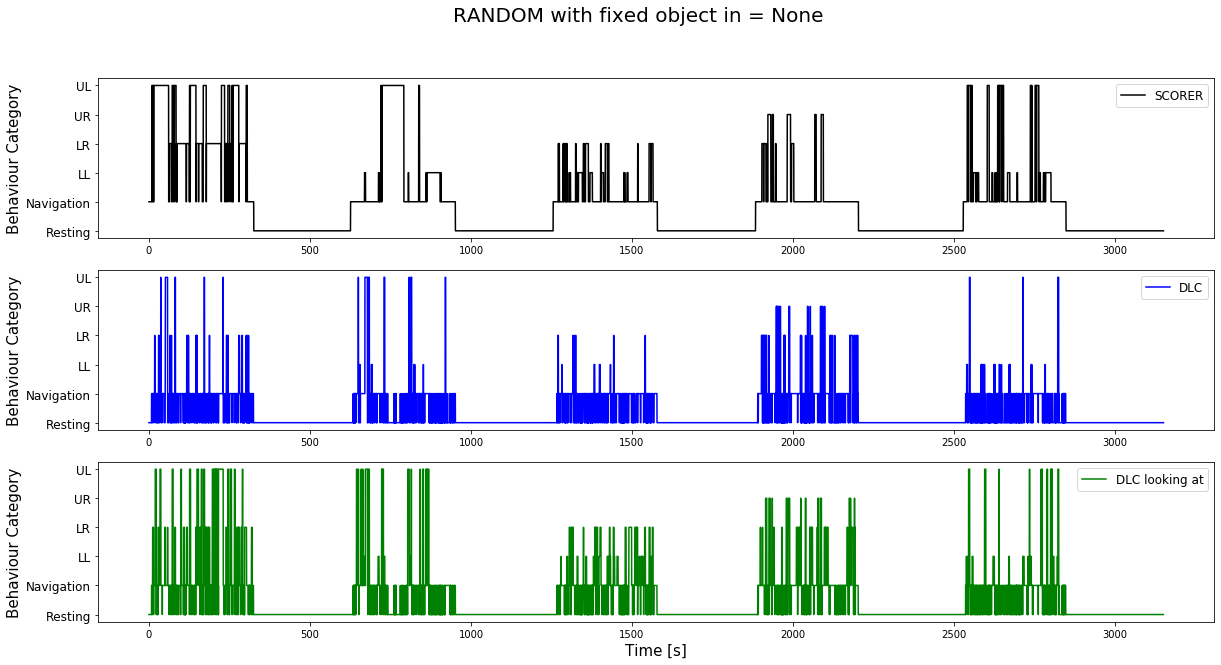

In [108]:
figure = plt.figure(constrained_layout=True)
gs = plt.GridSpec(3, 1)

axes1 = figure.add_subplot(gs[0, 0])
axes1.plot(np.arange(0,len(behaviour_dlc)/10,1/10),behaviour_scorer, c = 'k')
axes2 = figure.add_subplot(gs[1, 0])
axes2.plot(np.arange(0,len(behaviour_dlc)/10,1/10),behaviour_dlc, c = 'b')
axes3 = figure.add_subplot(gs[2, 0])
axes3.plot(np.arange(0,len(behaviour_dlc)/10,1/10),looking_dlc, c ='g' )

axes3.set_xlabel('Time [s]', fontsize = 15)
axes1.set_ylabel('Behaviour Category', fontsize = 15)
axes2.set_ylabel('Behaviour Category', fontsize = 15)
axes3.set_ylabel('Behaviour Category', fontsize = 15)

axes1.legend(['SCORER'],fontsize = 12)
axes2.legend(['DLC'],fontsize = 12)
axes3.legend(['DLC looking at'],fontsize = 12)

#axes1.set_xlim([0,300])
#axes2.set_xlim([0,300])
#axes3.set_xlim([0,300])

ylabels = [' ', 'Resting', 'Navigation', 'LL', 'LR', 'UR', 'UL']
axes1.set_yticklabels(ylabels, fontsize = 12)
axes2.set_yticklabels(ylabels, fontsize = 12)
axes3.set_yticklabels(ylabels, fontsize = 12)


figure.suptitle(task + ' with fixed object in = ' + fixed, fontsize = 20)
figure.set_size_inches(20,10)
figure_name = 'mouse_' + f'{mouse}' + '_session_' + f'{session_now}' + '_event_' + f'{min_event_duration}' + '_likelihood_0.75.png'
figure.savefig(figure_path + figure_name)

In [109]:
confusion_matrix_evaluation = confusion_matrix(behaviour_scorer,behaviour_dlc)
print(confusion_matrix_evaluation)
print(np.sum(confusion_matrix_evaluation,axis = 0))

#confusion_matrix_evaluation = confusion_matrix_evaluation/np.sum(confusion_matrix_evaluation,axis = 0)
print(confusion_matrix_evaluation)


[[15376     0     0     0     0     0]
 [ 3651  5175   207   350   152   201]
 [  573   816    12     0     0    19]
 [  516  1434     0   204     0     0]
 [  124   166     0     2    52     0]
 [ 1059  1182    34    46     0   156]]
[21299  8773   253   602   204   376]
[[15376     0     0     0     0     0]
 [ 3651  5175   207   350   152   201]
 [  573   816    12     0     0    19]
 [  516  1434     0   204     0     0]
 [  124   166     0     2    52     0]
 [ 1059  1182    34    46     0   156]]


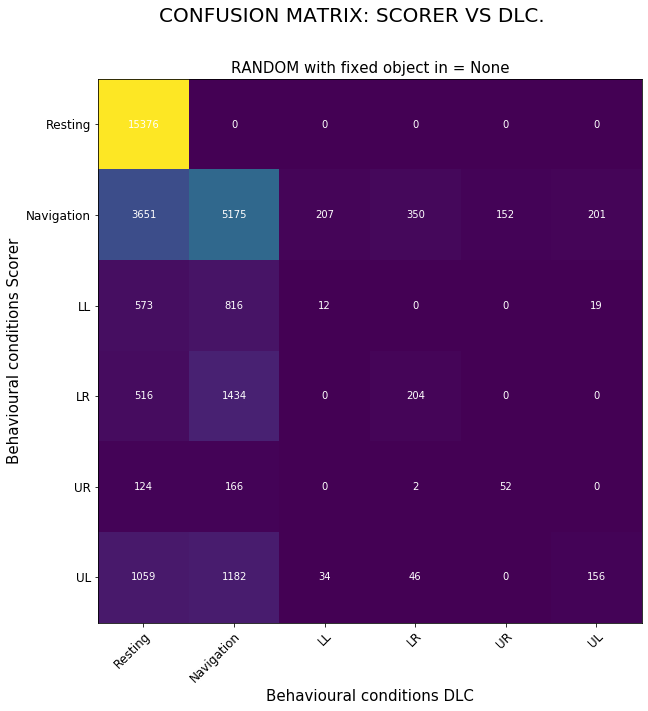

In [110]:
#plt.imshow(np.log10(confusion_matrix_evaluation))
figure, axes = plt.subplots(1)
axes.imshow(confusion_matrix_evaluation)
ylabels = [' ', 'Resting', 'Navigation', 'LL', 'LR', 'UR', 'UL']
axes.set_yticklabels(ylabels, fontsize = 12)
axes.set_xticklabels(ylabels, fontsize = 12)
axes.set_ylabel('Behavioural conditions Scorer',fontsize = 15)
axes.set_xlabel('Behavioural conditions DLC',fontsize = 15)


# Rotate the tick labels and set their alignment.
plt.setp(axes.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(ylabels)-1):
    for j in range(len(ylabels)-1):
        text = axes.text(j, i, round(confusion_matrix_evaluation [i, j],2),
                       ha="center", va="center", color="w")
        
figure.suptitle('CONFUSION MATRIX: SCORER VS DLC.', fontsize = 20)
axes.set_title(task + ' with fixed object in = ' + fixed, fontsize = 15)
figure.set_size_inches(20,10)
figure_name = 'mouse_' + f'{mouse}' + '_session_' + f'{session_now}' + '_event_' + f'{min_event_duration}' + '_likelihood_0.75_confusion_matrix.png'
figure.savefig(figure_path + figure_name)